In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn import tree
from itertools import combinations
from itertools import permutations
import matplotlib.pyplot as plt
%matplotlib inline

In [189]:
#df = pd.read_csv('mooc.csv', index_col=0)
df = pd.read_csv('data.csv')
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Thayer)  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [190]:
#df["IsMale"] = df["Sex"].map({"male":1, "female":0, "NaN": 0})
df["IsMale"] = df["Sex"].map({"male":1, "female":0})

In [191]:
#Change all NaN to 'Unknown'
df.fillna(value='Unknown', method=None, axis=1, inplace=True, limit=None, downcast=None)

In [192]:
dfage = df[df['Age'] == 'Unknown']

In [193]:
dfage.head()

PassengerId  Survived  Pclass                           Name     Sex  \
5             6         0       3               Moran, Mr. James    male   
17           18         1       2   Williams, Mr. Charles Eugene    male   
19           20         1       3        Masselmani, Mrs. Fatima  female   
26           27         0       3        Emir, Mr. Farred Chehab    male   
28           29         1       3  O'Dwyer, Miss. Ellen "Nellie"  female   

        Age  SibSp  Parch  Ticket     Fare    Cabin Embarked  IsMale  
5   Unknown      0      0  330877   8.4583  Unknown        Q       1  
17  Unknown      0      0  244373  13.0000  Unknown        S       1  
19  Unknown      0      0    2649   7.2250  Unknown        C       0  
26  Unknown      0      0    2631   7.2250  Unknown        C       1  
28  Unknown      0      0  330959   7.8792  Unknown        Q       0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000846C550>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000D3B6BE0>]], dtype=object)

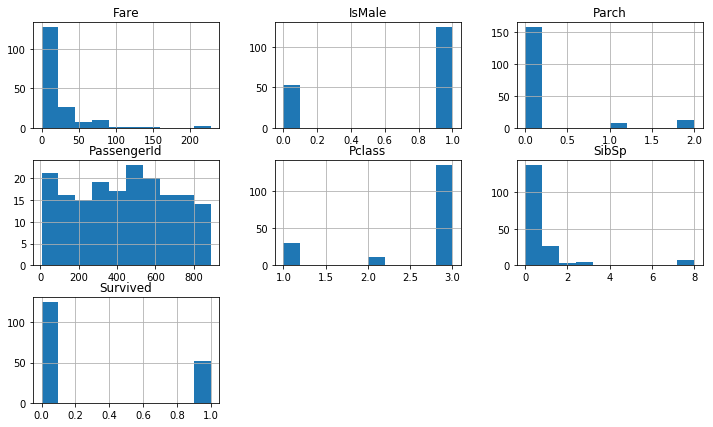

In [194]:
dfage.hist(figsize=(12,7))

In [82]:
df.describe()

PassengerId    Survived      Pclass       SibSp       Parch  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642    0.523008    0.381594   
std     257.353842    0.486592    0.836071    1.102743    0.806057   
min       1.000000    0.000000    1.000000    0.000000    0.000000   
25%     223.500000    0.000000    2.000000    0.000000    0.000000   
50%     446.000000    0.000000    3.000000    0.000000    0.000000   
75%     668.500000    1.000000    3.000000    1.000000    0.000000   
max     891.000000    1.000000    3.000000    8.000000    6.000000   

             Fare      IsMale  
count  891.000000  891.000000  
mean    32.204208    0.647587  
std     49.693429    0.477990  
min      0.000000    0.000000  
25%      7.910400    0.000000  
50%     14.454200    1.000000  
75%     31.000000    1.000000  
max    512.329200    1.000000

In [86]:
#Set null Age to the mean
#df.loc[df['Age'] == 'Unknown', 'Age'] = 29.7

#Remove rows with null Age
#drop(labels=None, axis=0, index=None, columns=None, level=None, inplace=Tre, errors='raise')
df = df[df['Age'] != 'Unknown']

In [87]:
df['Embarked'] = df.Embarked.astype('category').cat.codes

In [88]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38      1   
2                             Heikkinen, Miss. Laina  female  26      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35      1   
4                           Allen, Mr. William Henry    male  35      0   

   Parch            Ticket     Fare    Cabin  Embarked  IsMale  
0      0         A/5 21171   7.2500  Unknown         2       1  
1      0          PC 17599  71.2833      C85         0       0  
2      0  STON/O2. 3101282   7.9250  Unknown         2       0  
3      0            113803  53.1000     C123         2       0  
4      0            373450   8.0500  Unknown         2       1

In [89]:
df.isnull().values.any()

False

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    714 non-null int64
Survived       714 non-null int64
Pclass         714 non-null int64
Name           714 non-null object
Sex            714 non-null object
Age            714 non-null object
SibSp          714 non-null int64
Parch          714 non-null int64
Ticket         714 non-null object
Fare           714 non-null float64
Cabin          714 non-null object
Embarked       714 non-null int8
IsMale         714 non-null int64
dtypes: float64(1), int64(6), int8(1), object(5)
memory usage: 73.2+ KB


In [175]:
X = df[['IsMale','Fare','Age','Parch','SibSp','Embarked','Pclass']]
y = df.Survived

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [177]:
#model = tree.DecisionTreeClassifier(max_depth=1).fit(iris.data, iris.target)
model = tree.DecisionTreeClassifier(max_depth=4).fit(X_train, y_train)

In [178]:
model.score(X_train, y_train)

0.85564853556485354

In [179]:
model.score(X_test, y_test)

0.78813559322033899

In [180]:
y_hat = model.predict(X_test)

In [181]:
confusion_matrix(y_test,y_hat).ravel()

array([116,  21,  29,  70], dtype=int64)

In [182]:
TN,FP,FN,TP = confusion_matrix(y_test,y_hat).ravel()
TOTAL = TP + TN + FP + FN
acc = (TP + TN) / TOTAL
recall = TP / (TP + FN)
precision = TP / (TP + FP)
print ("Accuracy  :",acc)
print ("Recall    :", recall)
print ("Precision :", precision)

Accuracy  : 0.78813559322
Recall    : 0.707070707071
Precision : 0.769230769231


In [184]:
dffinal = df
rows = []
y = dffinal.Survived
flist = ['IsMale','Fare','Age','Parch','SibSp','Embarked','Pclass']
for i in range(1,len(flist)+1):
    combos = list(combinations(flist,i))
    for j,com in enumerate(combos):
        X = pd.DataFrame(dffinal, columns=com)
        model = model = tree.DecisionTreeClassifier(max_depth=4).fit(X, y)
        #model = LogisticRegression()
        accuracy = cross_val_score(model, X, y, cv=10, scoring='accuracy').mean()
        s = ', '.join(com)
        rows.append({'Accuracy':accuracy,'Columns':s})
        #rows.append({'Accuracy':accuracy,'Columns':s, 'Coef': model.fit(X, y).coef_})
dfresult = pd.DataFrame(rows)
pd.options.display.max_colwidth = 100
dfresult.sort_values('Accuracy',ascending=False)

Accuracy                                            Columns
73   0.815063                          IsMale, Age, Parch, SibSp
108  0.808020                IsMale, Age, Parch, SibSp, Embarked
34   0.803795                                 IsMale, Age, SibSp
109  0.802504                  IsMale, Age, Parch, SibSp, Pclass
77   0.802504                         IsMale, Age, SibSp, Pclass
64   0.802426                           IsMale, Fare, Age, SibSp
101  0.800998                 IsMale, Fare, Age, SibSp, Embarked
76   0.796792                       IsMale, Age, SibSp, Embarked
111  0.795520               IsMale, Age, SibSp, Embarked, Pclass
98   0.795462                    IsMale, Fare, Age, Parch, SibSp
124  0.794131        IsMale, Age, Parch, SibSp, Embarked, Pclass
37   0.794092                               IsMale, Parch, SibSp
42   0.792762                           IsMale, Embarked, Pclass
41   0.792723                              IsMale, SibSp, Pclass
36   0.792703                                IsMale, Age, Pclass
119  0.792645          IsMale, Fare, Age, Parch, SibSp, Embarked
102  0.791412                   IsMale, Fare, Age, SibSp, Pclass
126  0.791412  IsMale, Fare, Age, Parch, SibSp, Embarked, Pclass
122  0.791412         IsMale, Fare, Age, SibSp, Embarked, Pclass
12   0.791354                                     IsMale, Pclass
75   0.791295                         IsMale, Age, Parch, Pclass
120  0.790004            IsMale, Fare, Age, Parch, SibSp, Pclass
79   0.789867                     IsMale, Parch, SibSp, Embarked
38   0.787031                            IsMale, Parch, Embarked
9    0.787031                                      IsMale, Parch
105  0.785759                 IsMale, Fare, Parch, SibSp, Pclass
80   0.785739                       IsMale, Parch, SibSp, Pclass
78   0.785720                      IsMale, Age, Embarked, Pclass
71   0.784351                        IsMale, Fare, SibSp, Pclass
32   0.784351                               IsMale, Fare, Pclass
..        ...                                                ...
117  0.693466               Fare, Parch, SibSp, Embarked, Pclass
84   0.689202                         Fare, Age, Parch, Embarked
45   0.689202                                Fare, Age, Embarked
26   0.686581                                      SibSp, Pclass
13   0.685016                                          Fare, Age
43   0.685016                                   Fare, Age, Parch
62   0.683822                            SibSp, Embarked, Pclass
14   0.675254                                        Fare, Parch
15   0.669601                                        Fare, SibSp
59   0.665473                             Parch, SibSp, Embarked
27   0.665473                                   Embarked, Pclass
6    0.664143                                             Pclass
50   0.663987                              Fare, SibSp, Embarked
48   0.661248                              Fare, Parch, Embarked
23   0.658490                                    Parch, Embarked
53   0.658412                                  Age, Parch, SibSp
1    0.656964                                               Fare
56   0.652739                               Age, SibSp, Embarked
93   0.651330                        Age, Parch, SibSp, Embarked
22   0.647281                                       Parch, SibSp
16   0.647183                                     Fare, Embarked
20   0.640102                                      Age, Embarked
54   0.638791                               Age, Parch, Embarked
5    0.635955                                           Embarked
25   0.629010                                    SibSp, Embarked
18   0.626213                                         Age, Parch
3    0.623415                                              Parch
19   0.619171                                         Age, SibSp
2    0.619053                                                Age
4    0.609331                           